In [1]:
from deck_of_cards import deck_of_cards
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

- Card ranks: rank 0 represents 2, rank 13 represents Ace
- Suit number is arbitrary

In [2]:
winning_player = []
trump = []
p1_suit = []
p1_rank = []
p2_suit = []
p2_rank = []
p3_suit = []
p3_rank = []
p4_suit = []
p4_rank = []

In [3]:
def play_round():
    
    # initialize the deck
    deck_obj = deck_of_cards.DeckOfCards()
    deck_obj.shuffle_deck()
    
    # deal one card to each player
    p1_card = deck_obj.give_random_card()
    p2_card = deck_obj.give_random_card()
    p3_card = deck_obj.give_random_card()
    p4_card = deck_obj.give_random_card()
    
    # flip the top card of the deck to determine the trump suit
    # notice, this is different than choosing a random number 1-4
    trump_card = deck_obj.give_random_card()
    trump_suit = trump_card.suit # get the suit from the card object
    
    # make list of players cards
    cards = [p1_card, p2_card, p3_card, p4_card]
    # get suits in list
    suits = [card.suit for card in cards]
    # get ranks in list
    ranks = [card.rank for card in cards]
    
    # make a dataframe of the players and cards
    df = pd.DataFrame({'player':['p1', 'p2', 'p3', 'p4'],
                           'suit':suits,
                           'ranks':ranks})

    df['trump'] = trump_suit

    #print(df)
    
    # first case if at least one player has a card in trump suit
    if (df.suit == df.trump).sum() != 0:
        # get dataframe of only players with trump cards
        trump_players = df.loc[df.suit == trump_suit,]
        # winner is player with trump card of highest rank, adjusted for index 0
        winner = trump_players.ranks.idxmax() + 1
    # other case is no player has trump
    else:
        # we only care about players with cards the same suit as player 1
        p1_suit_players = df[df.suit == p1_card.suit]
        # winner is player with the highest rank card in the suit of player 1
        winner = p1_suit_players.ranks.idxmax() + 1

        
    winning_player.append(winner)
    trump.append(trump_suit)
    p1_suit.append(suits[0])
    p1_rank.append(ranks[0])
    p2_suit.append(suits[1])
    p2_rank.append(ranks[1])
    p3_suit.append(suits[2])
    p3_rank.append(ranks[2])
    p4_suit.append(suits[3])
    p4_rank.append(ranks[3])
    
    if winner == 1:
        return 1
    else:
        return 0

In [36]:
i = 0
wins = 0
n = 100000
while i < n:
    wins += play_round()
    i += 1
    if i % (n/100) == 0:
        print(i/(n/100))

print("Player 1 Win Percentage")
print(wins / n)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
Player 1 Win Percentage
0.37131


In [37]:
df = pd.DataFrame({
    'winning_player':winning_player,
    'trump':trump,
    'p1_suit':p1_suit,
    'p1_rank':p1_rank,
    'p2_suit':p2_suit,
    'p2_rank':p2_rank,
    'p3_suit':p3_suit,
    'p3_rank':p3_rank,
    'p4_suit':p4_suit,
    'p4_rank':p4_rank,
})

In [38]:
df.head(10)

,winning_player,trump,p1_suit,p1_rank,p2_suit,p2_rank,p3_suit,p3_rank,p4_suit,p4_rank
0,2,0,3,9,0,4,0,3,2,13
1,1,0,0,13,0,10,1,4,2,12
2,4,1,2,3,3,12,0,11,2,8
3,2,3,2,2,3,3,1,7,0,13
4,3,0,1,11,1,12,0,4,3,6
5,4,2,2,7,3,8,0,1,2,8
6,1,1,2,4,0,6,2,1,3,12
7,1,3,3,1,1,8,1,13,2,2
8,4,3,0,12,1,2,2,2,3,8
9,3,0,3,3,3,2,0,13,0,8


In [39]:
# get subset of Player 1 suit not trump and player 1 card is a 2
subset = df[(df.p1_suit != df.trump) & (df.p1_rank == 1)]

In [40]:
len(subset[subset.winning_player == 1]) / len(subset)

0.13241051454138703

In [41]:
len(subset)

7152

In [42]:
# helper functions to calculate win percentages of player 1 having a given card
def calculate_win_percent(card):
    subset = df[(df.p1_suit != df.trump) & (df.p1_rank == card)]
    return len(subset[subset.winning_player == 1]) / len(subset)


def calculate_win_percent_trump(card):
    subset = df[(df.p1_suit == df.trump) & (df.p1_rank == card)]
    return len(subset[subset.winning_player == 1]) / len(subset)

In [43]:
calculate_win_percent(10)

0.33977160580854365

In [44]:
calculate_win_percent_trump(1)

0.4723127035830619

In [45]:
calculate_win_percent_trump(2)

0.5233688107357705

In [46]:
y = [calculate_win_percent(card) for card in range(1,14)]
yt = [calculate_win_percent_trump(card) for card in range(1,14)]

In [47]:
x = list(range(1,14))

#y.extend(yt)

In [48]:
x = np.array(x)
y = np.array(y)

<AxesSubplot:>

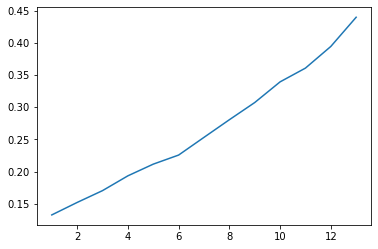

In [49]:
sns.lineplot(x = x, y = y)

In [50]:
yt = np.array(yt)

<AxesSubplot:>

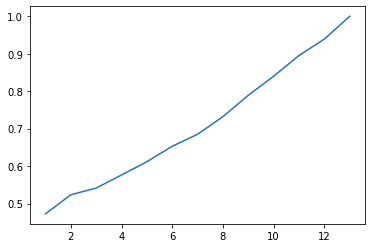

In [51]:
sns.lineplot(x=x, y=yt)

In [52]:
y_all = list(y)
y_all.extend(yt)

In [53]:
len(y_all)

26

<AxesSubplot:>

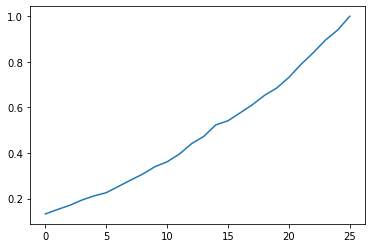

In [54]:
# plot all cards win percent for player 1
sns.lineplot(x = np.arange(26), y = y_all)

In [55]:
calculate_win_percent_trump(3)

0.541301338255653

In [56]:
calculate_win_percent_trump(2)

0.5233688107357705

In [57]:
calculate_win_percent_trump(1)

0.4723127035830619

In [58]:
# confidence interval on win percentage for player 1

winp = wins/n
print(str(winp) + " +/- " + str( 1.96 * np.sqrt(n*winp*(1-winp)) / n))

0.37131 +/- 0.0029946265483199066


In [62]:
# true probability of player 1 winning with 2 of trump
# 52 card deck, player 1 has 2, trump card flipped, leaves 11 trumps out of 50 cards,
# probility that any player has trump higher than 2
# ==
# 1 - probablity(players 2-4 have no trumps)
# order matters, trump is chosen after cards dealt to players
# so the below math does not work exactly
# need probability(player 1 has 2 and trump chosen is player 1 suit and no other player has that suit)

39/50 * 38/49 * 37/48

0.46627551020408164

- This probability calculation should be more complicated
    - The trump suit is less likely to be a suit of any of the cards dealtf

In [63]:
p = calculate_win_percent_trump(1)
p

0.4723127035830619

In [64]:
print(str(round(p, 4)) + " +/- " + str(round(np.sqrt(n*p*(1-p)) * 2.5 / n, 4)))

0.4723 +/- 0.0039
